Анализ сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки

- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra

- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

Описание данных

Пользователи — users_go.csv

- user_id — уникальный идентификатор пользователя
- name — имя пользователя
- age — возраст
- city — город
- subscription_type — тип подписки (free, ultra)
- Поeздки — rides_go.csv

Поездки — rides_go.csv

- user_id — уникальный идентификатор пользователя
- distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date — дата совершения поездки
- Подписки — subscriptions_go.csv

Подписки — subscriptions_go.csv

- subscription_type — тип подписки
- minute_price — стоимость одной минуты поездки по данной подписке
- start_ride_price — стоимость начала поездки
- subscription_fee — стоимость ежемесячного платежа

Цель исследования: обработать данные и на их основе проверерить гиптоезы, которые могут помочь бизнесу вырасти

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from matplotlib.pyplot import figure



#### Шаг 1. Загрузка данных

In [2]:
users_df=pd.read_csv('/datasets/users_go.csv')
rides_df=pd.read_csv('/datasets/rides_go.csv')
sub_df=pd.read_csv('/datasets/subscriptions_go.csv')

display(users_df.head())
display()
display(rides_df.head())
display()
display(sub_df.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [3]:
display(users_df.info())

display(rides_df.info())

display(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

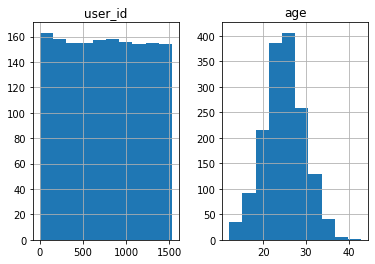

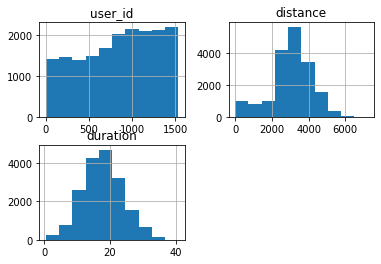

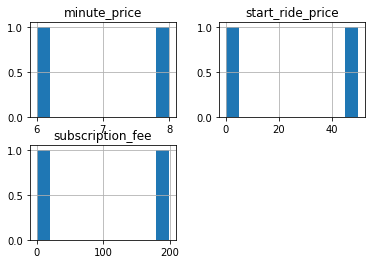

In [4]:
users_df.hist();
rides_df.hist();
sub_df.hist();

В целом данные без явных проблем, все значения выглядят адекватными. Стоит поменять формат даты на соответствующий. Из графика возрастов видим, что наиболее популярен сервис среди пользователей от 20 до 30 лет. В основном люди проезжают расстояние в 3км и делают это за 20 минут

#### Шаг 2. Предобработка данных

In [5]:
display(users_df.isna().sum())
display(rides_df.isna().sum())
display(sub_df.isna().sum())
display()
display(users_df.describe())
display(rides_df.describe())
display(sub_df.describe())
#на первый взгляд данные выглядят нормально, без явных выбросов. 

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


In [6]:
print('уникальных значений в user_id в датафрейме users:', len(users_df['user_id'].unique()))
#видим, что есть дубилкаты, тк всего 1565 строк
print(users_df['city'].unique())
#неявных дубликатов в city нет.Столбец age проверять смысла нет, тк это возраст и он может повторяться
print(users_df['subscription_type'].unique())
#в целом, в этом столбце ultra и free можно заменить на булево значение 
display(users_df.duplicated())
users_df.drop_duplicates(inplace=True)#удаляем дубликаты
users_df.duplicated().sum()

уникальных значений в user_id в датафрейме users: 1534
['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']
['ultra' 'free']


0       False
1       False
2       False
3       False
4       False
        ...  
1560     True
1561     True
1562     True
1563     True
1564     True
Length: 1565, dtype: bool

0

In [7]:
users_df.duplicated().sum()

0

In [8]:
print('уникальных значений в user_id в датафрейме rides:', len(rides_df['user_id'].unique())) 
#всего 1534 уникальные строчки, но это обусловлено тем, что некоторые пользователи катаются не по 1 разу


уникальных значений в user_id в датафрейме rides: 1534


In [9]:
rides_df['date'] = pd.to_datetime(rides_df['date'], format = '%Y-%m-%d')
#меняем формат данных с object на необходимый для даты
rides_df['date'].head(10)
#стоит проверить, предоставлены ли данные за 1 год
print(rides_df['date'].dt.year.unique())
#да, за 1 год, значит просто добавим номер месяца 
rides_df['month'] = rides_df['date'].dt.month

print(rides_df)


[2021]
       user_id     distance   duration       date  month
0            1  4409.919140  25.599769 2021-01-01      1
1            1  2617.592153  15.816871 2021-01-18      1
2            1   754.159807   6.232113 2021-04-20      4
3            1  2694.783254  18.511000 2021-08-11      8
4            1  4028.687306  26.265803 2021-08-28      8
...        ...          ...        ...        ...    ...
18063     1534  3781.098080  19.822962 2021-11-04     11
18064     1534  2840.423057  21.409799 2021-11-16     11
18065     1534  3826.185507  18.435051 2021-11-18     11
18066     1534  2902.308661  16.674362 2021-11-27     11
18067     1534  2371.711192  15.893917 2021-12-29     12

[18068 rows x 5 columns]


Пропусков в данных не обнаружено
Дубликаты были обнаружены в идентификаторах пользователей и удалены
Добавили столбец month с номером месяца

#### Шаг 3. Исследовательский анализ данных

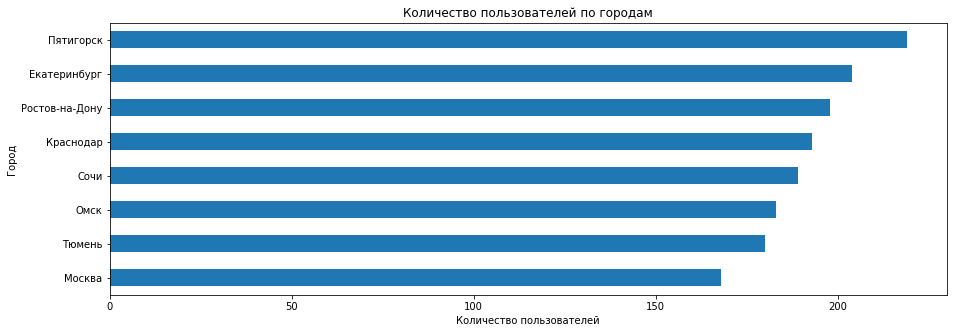

In [10]:
users_df.groupby('city')['user_id'].count().sort_values()\
    .plot(kind = 'barh',
         ylabel = 'Количество пользователей',
         title = 'Количество пользователей по городам',
         figsize = (15, 5))
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.show()


Из графика и таблицы видим, что наиболее полпулярным городом является Пятигорск(14% или 219 значений), а наименее популярным - Москва (11% или 168 значений)


free     835
ultra    699
Name: subscription_type, dtype: int64


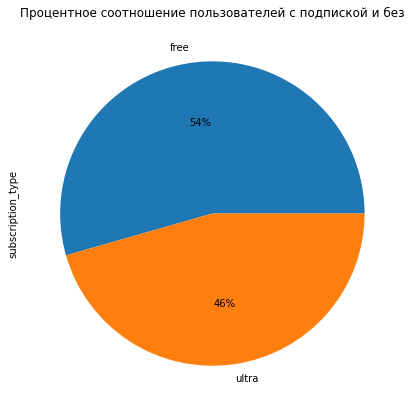

In [11]:
subs = users_df['subscription_type'].value_counts()
users_df['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = subs, 
    autopct = '%1.0f%%',
    title = 'Процентное соотношение пользователей c подпиской и без',
    figsize=(7,7));#график соотношения пользователей с подпиской и без 
print(subs)
#из графика видим, что преимущественно(54% или 835 пользователей) пользуются подпиской free

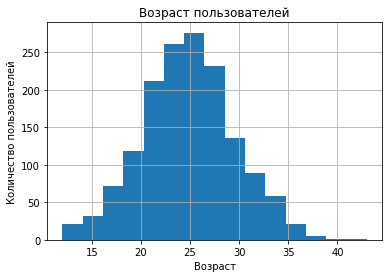

приложением пользуются люди в возрасте от 12 до 43 лет


In [12]:
plt.hist(users_df['age'], bins = 15)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.title('Возраст пользователей')
plt.show()
#график распредления возрастов 
#из графика видим, что наиболее популярно приложение среди лиц, в возрасте от 21 года до 28 лет
#в целом, приложением пользуются люди от 
print('приложением пользуются люди в возрасте от {0} до {1} лет'.format(users_df['age'].min(), users_df['age'].max()))
    

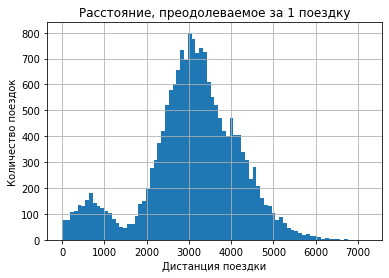

дистанция поездки варьируется от 0.001 до 7.21 км


In [13]:
plt.hist(rides_df['distance'], bins = 80)
plt.xlabel('Дистанция поездки')
plt.ylabel('Количество поездок')
plt.grid()
plt.title('Расстояние, преодолеваемое за 1 поездку')
plt.show()
#из графика видим, что в среднем люди проезжают от 2,5 до 4 км
print('дистанция поездки варьируется от {0} до {1} км'.format(round(rides_df['distance'].min()/1000,3), round(rides_df['distance'].max()/1000,2)))
#видим, что наименьашя поездка была на дистанции 1м, а наибольшаяя 7,21 км

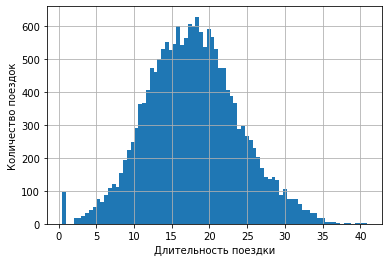

длительность поездки варьируется от 0.5 до 40.82 минут


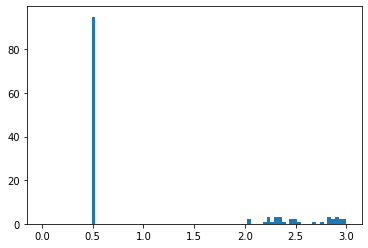

In [14]:
plt.hist(rides_df['duration'], bins = 80)
plt.xlabel('Длительность поездки')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

print('длительность поездки варьируется от {0} до {1} минут'.format(rides_df['duration'].min(), round(rides_df['duration'].max(),2)))
plt.hist(rides_df['duration'], bins = 80, range ={0,3})
plt.show()

Из графика видим, что в среднем люди проезжают от 2,5 до 4 км. Самая быстрая поездка завершилась за пол минуты, а самая долая длилась почти 41 минуту.

Также наблюдается небольшое количество поездок (около 100) продолжительностью в 30 сек.

Вывод
Услугами сервиса пользуются жители 8 городов, наиболее популярно приложение в Пятгорске, в нем было совершено 219 поездок, а наименее популярно в Москве, где было совершено всего 168 поездок

Большинство пользователей (54%) пользуются подпиской типа free

Услугами пользуются люди в возрасте от 12 до 43 лет, а наиболее популярен серверис среди пользователей в возрасте 25 лет

В среднем люди проезжают от 2,5 до 4км, наименьшей дистанцией поездки был 1 метр, а наибольшей 7,21 км

Длительность поездки в среднем составляет от 13 до 23 минут, самая долгая поездка длилась 40,82 минут, а самая короткая завершилась за пол минуты. Это значение достаточно странное, тк оно встречается почти 100 раз, что может быть обусловленно либо тем, что если человек отменяет поездку, то ее продолжительность принимается за 0.5 минуты, либо какое-то количество самокатов было неисправно, от чего люди отменяли поездки в столь короткий промежуток времени


#### Шаг 4. Объединение данных

In [15]:
df = users_df.merge(rides_df, on='user_id').merge(sub_df, on='subscription_type')
print(df.head(10))



   user_id  name  age    city subscription_type     distance   duration  \
0        1  Кира   22  Тюмень             ultra  4409.919140  25.599769   
1        1  Кира   22  Тюмень             ultra  2617.592153  15.816871   
2        1  Кира   22  Тюмень             ultra   754.159807   6.232113   
3        1  Кира   22  Тюмень             ultra  2694.783254  18.511000   
4        1  Кира   22  Тюмень             ultra  4028.687306  26.265803   
5        1  Кира   22  Тюмень             ultra  2770.890808  16.650138   
6        1  Кира   22  Тюмень             ultra  3039.020292  14.927879   
7        1  Кира   22  Тюмень             ultra  2842.118050  23.117468   
8        1  Кира   22  Тюмень             ultra  3412.690668  15.238072   
9        1  Кира   22  Тюмень             ultra   748.690645  15.041884   

        date  month  minute_price  start_ride_price  subscription_fee  
0 2021-01-01      1             6                 0               199  
1 2021-01-18      1           

In [16]:
print(df['subscription_type'].unique())
df.loc[df['subscription_type'] == 'free', 'subscription_type'] = False
df.loc[df['subscription_type'] == 'ultra', 'subscription_type'] = True
df['subscription_type'].astype(bool)#меняем формат данных

free_subs = df.query('subscription_type == False')
ultra_subs = df.query('subscription_type == True')

print(free_subs.head())
print(ultra_subs.head())

['ultra' 'free']
      user_id   name  age  city subscription_type     distance   duration  \
6500      700  Айдар   22  Омск             False  2515.690719  14.944286   
6501      700  Айдар   22  Омск             False   846.932642  16.234663   
6502      700  Айдар   22  Омск             False  4004.434142  20.016628   
6503      700  Айдар   22  Омск             False  1205.911290   9.782872   
6504      700  Айдар   22  Омск             False  3047.379435  17.427673   

           date  month  minute_price  start_ride_price  subscription_fee  
6500 2021-01-02      1             8                50                 0  
6501 2021-02-01      2             8                50                 0  
6502 2021-02-04      2             8                50                 0  
6503 2021-02-10      2             8                50                 0  
6504 2021-02-14      2             8                50                 0  
   user_id  name  age    city subscription_type     distance   duratio

In [17]:
#проверим не потерялись ли данные при объединении таблиц
display(df.info())
display(df.isna().sum())
display(len(df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


None

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

18068

In [18]:
#проверим не потерялись ли данные при разделении таблиц
display(free_subs.info())
display(free_subs.isna().sum())
display(len(free_subs))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


None

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

11568

In [19]:
display(ultra_subs.info())
display(ultra_subs.isna().sum())
display(len(ultra_subs))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


None

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

6500

In [20]:
display(len(free_subs)+len(ultra_subs) == len(df))

True

Проверили данные и убедились, что пропуски не появились, а сумма длин 2 новых датафреймов, равна длине изначального датафрейма

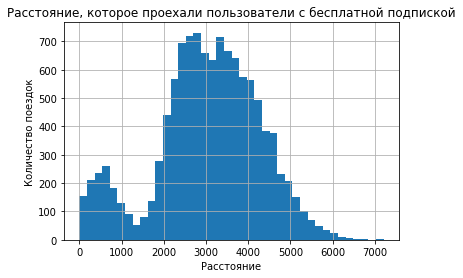

<Figure size 2160x1440 with 0 Axes>

In [21]:
plt.hist(free_subs['distance'], bins=40)
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.grid()
plt.title('Расстояние, которое проехали пользователи с бесплатной подпиской')
plt.figure(figsize=(30,20))
plt.show()#график с расстоянием по бесплатным подпискам

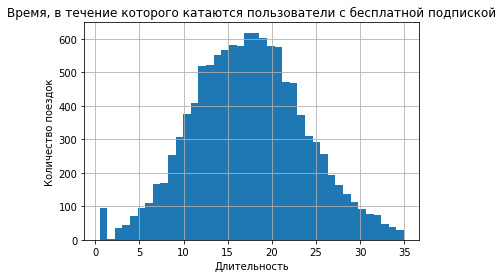

<Figure size 1440x1440 with 0 Axes>

In [22]:
plt.hist(free_subs['duration'], bins=40)
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.grid()
plt.title('Время, в течение которого катаются пользователи с бесплатной подпиской')
plt.figure(figsize=(20,20))
plt.show()#график с временем по бесплатным подпискам

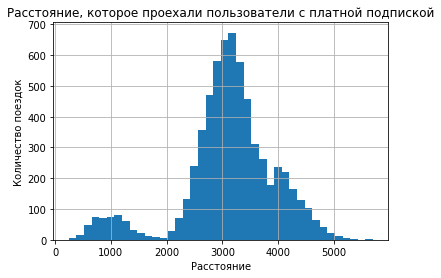

<Figure size 1440x1440 with 0 Axes>

In [23]:
plt.hist(ultra_subs['distance'], bins=40)
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.grid()
plt.title('Расстояние, которое проехали пользователи с платной подпиской')
plt.figure(figsize=(20,20))
plt.show()#график с расстоянием по платным подпискам

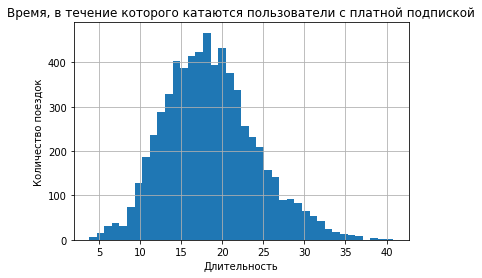

<Figure size 1440x1440 with 0 Axes>

In [24]:
plt.hist(ultra_subs['duration'], bins=40)
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.grid()
plt.title('Время, в течение которого катаются пользователи с платной подпиской')
plt.figure(figsize=(20,20))
plt.show()#график с временем по платным подпискам

In [25]:
print(free_subs['duration'].describe())
print()
print(ultra_subs['duration'].describe())

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


Вывод
Объединили данные из 3 таблиц в 1 и создали 2 новые таблицы для пользователей с платной и бесплатной подпиской

Пользователи с бесплатным тарифом проезжают расстояние в основном от 2 до 4,5 км, но существуют и такие, которые катаются на 6км+. Время поездок в основном составляет от 12 до 23 минуты

Пользователи с платным тарифом проезжают в основном от 2,5 до 3,5 км,с длительностью от 13 минут до 20 минут

Можно сказать, что пользователи с бесплатным тарифом ездят на большее расстояние, но, судя по медиане, катаются меньше, чем пользователи с платной подпиской

#### Шаг 5. Подсчёт выручки

In [26]:
df['duration'] = np.ceil(df['duration']) 
total_df = df.pivot_table(index = ('user_id', 'month'), values = (
                           'distance', 
                           'duration', 
                           'minute_price', 
                           'start_ride_price', 
                           'subscription_fee'), aggfunc = {'count', 'sum'})
total_df.columns = [
    'trips', 'distance', 
    'c1', 'duration', 
    'c2', 'minute_price',
    'c3', 'start_ride_price', 
    'c4', 'subscription_fee'] #изменил столбцы на 1-4, чтобы потом их удалить и избавиться от кривого отображения таблицы
total_df = total_df.drop(['c1','c2','c3','c4'], axis = 1)#удалил вспомогательные столбцы
#print(total_df)
#в столбце стоимость начала поездки указана сумма, меняем на стоимость начала 1 поездки
total_df['start_ride_price'] = total_df['start_ride_price']/total_df['trips']
#аналогично поступаем со стоимостью ежемесячного платежа
total_df['subscription_fee'] = total_df['subscription_fee']/total_df['trips']
#и со стоимостью одной минуты поездки поступаем также
total_df['minute_price'] = total_df['minute_price']/total_df['trips']

print(total_df)

               trips      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0           6.0               0.0   
        4          1    754.159807       7.0           6.0               0.0   
        8          2   6723.470560      46.0           6.0               0.0   
        10         2   5809.911100      32.0           6.0               0.0   
        11         3   7003.499363      56.0           6.0               0.0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0           8.0              50.0   
        8          2   7622.453034      48.0           8.0              50.0   
        9          1   4928.173852      23.0           8.0              50.0   
        11         4  13350.015305      78.0           8.0              50.0   
        12         1   2371.711192      

In [27]:
#рассчитываем выручку
total_df['revenue'] = (
    (total_df['start_ride_price'] * total_df['trips']) 
    + (total_df['minute_price'] * total_df['duration']) 
    + total_df['subscription_fee'])
print(total_df)


               trips      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0           6.0               0.0   
        4          1    754.159807       7.0           6.0               0.0   
        8          2   6723.470560      46.0           6.0               0.0   
        10         2   5809.911100      32.0           6.0               0.0   
        11         3   7003.499363      56.0           6.0               0.0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0           8.0              50.0   
        8          2   7622.453034      48.0           8.0              50.0   
        9          1   4928.173852      23.0           8.0              50.0   
        11         4  13350.015305      78.0           8.0              50.0   
        12         1   2371.711192      

In [28]:
# Код ревьюера
total_df.groupby('subscription_fee')['revenue'].mean()

subscription_fee
0.0      328.641365
199.0    362.792191
Name: revenue, dtype: float64

#### Шаг 6. Проверка гипотез

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Н0 - время поездки у пользователей с подпиской (True в столбце subscription_type) равно времени поездки у пользователей без подписки

Н1 - время поездки у пользователей с подпиской (True) больше времени поездки у пользователей без подписки

In [29]:
len(free_subs['duration'])

11568

In [30]:
len(ultra_subs['duration'])

6500

In [31]:
alpha = .05

results = st.ttest_ind(ultra_subs['duration'], 
                       free_subs['duration'],
                       alternative = 'greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Мы проверили гипотезу, заключающуюся в том, что время поездки у пользователей с подпиской равно времени поездки у пользователей без нее и отвергли ее

In [33]:
#Н0 - Пользователи с подпиской проезжают расстояние равное 3130 метрам
#Н1 - Пользователи с подпиской проезжают расстояние больше 3130 метров

alpha = .05

results = st.ttest_1samp(
    ultra_subs['distance'], 
    3130,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Мы проверили гипотезу и не можем утверждать, что расстояние, которое проезжают пользователи с подпиской меньше 3130 метров. 

Это свидетельсвует о том, что самокат изнашивется в большей мере.

In [34]:
#Н0 - выручка от пользователей с подпсикой равна выручке от пользователей без подписки
#Н1 - выручка от пользователей с подпсикой больше выручки от пользователей без подписки

ultra_per_mnth = total_df.loc[total_df.subscription_fee  > 0, 'revenue'] 

free_per_mnth = total_df.loc[total_df.subscription_fee  == 0 , 'revenue'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Проверили гипотезу и отвергли нулвеую гипотезу о том, что выручка от пользователей с подпиской равна выручке от пользователей без подписки.
Значит, что логично, выручка от пользователей с подпиской выше, чем выручка от пользователей без нее

Для проверки гипотезы из пункта 6.4 стоит воспользоваться способом st.ttest_rel(), тк это 2 зависимых выборки.
Гипотезы будут выглядеть так:

Н0:  μ0 = μ1

Н1:  μ0 != μ1

Общий вывод
После загрузки данных и их изучения, изменил формат данных для даты в таблице riders_df,удалил повторяющиеся значения в таблице users_df, а также добавил столбец с номером месяца.

Был проведен исследовательский анализ данных, в ходе которого было выяснено, что услугами сервиса пользуются жители 8 городов, самый популярный - Пятигорск, наименее популярный - Москва. Большинство пользователей (54%) пользуются подпиской типа free. Услугами пользуются люди в возрасте от 12 до 43 лет, а наиболее популярен серверис среди пользователей в возрасте 25 лет. В среднем люди проезжают от 2,5 до 4км, наименьшей дистанцией поездки был 1 метр, а наибольшей 7,21 км . Длительность поездки в среднем составляет от 13 до 23 минут, самая долгая поездка длилась 40,82 минут, а самая короткая завершилась за пол минуты.

Объединили данные из всех таблиц в одну общую таблицу и создали еще 2 таблицы c данными о пользователях без подписки и о пользователях с подпиской, затем визуализировали информацию о расстоянии и времени поездок обеих категорией пользователей

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, вывели это все в новую таблицу и посчитали выручку.

Проверили гипотезы:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Отвергли нулевую гипотезу, (Н0 - время поездки у пользователей с подпиской (True в столбце subscription_type) равно времени поездки у пользователей без подписки)

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
Не удалось отвергнуть нулевую гипотезу (Пользователи с подпиской проезжают расстояние равное 3130 метрам)

Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Отвергли нулевую гипотезу (выручка от пользователей с подпсикой равна выручке от пользователей без подписки)

Пользователи с подпиской являются более выгодными для компании, потому что они тратят на поездки бОльшее количество времени и соответсвенно приносят больше прибыли, однако не стоит забывать, что они проезжают и большее расстояние, что способсвтует физическому износу самокатов. По моему мнению пользователи с подпиской выгоднее, но стоит рассмотреть насколько сильно изнашиваются самокаты, если СПИ самокатов не сильно большой и износ не приводит к полной неработоспособности самокатов до окончания этого срока, то подписчики, очевидно выгоднее, если все же приводит, то нужно пересматривать стоимость поездок и подписок.